In [1]:
### Import Packages ###
import glob, os, sys
import numpy as np
import matplotlib.pyplot as plt


In [2]:
### Importing Neuronal Spiking Data ###

#Working directory for where the data is stored
cwd = "/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806"

#Import the spike time for electrodes and sort
spkFile_paths = [file for file in glob.glob(os.path.join(cwd, "Mouse12-120806.res.[0-8]"))]
spkFile_paths.sort()

#Import the cluster identities for electrodes and sort
clusFile_paths = [file for file in glob.glob(os.path.join(cwd, "Mouse12-120806.clu.[0-8]"))]
clusFile_paths.sort()

#Lists to store the numpy data
spk_data = []
clus_data = []
#Iterate over paths to import raw data
print("Importing data from files:")
for file_idx in range(0,len(clusFile_paths)): #TODO: limiting it to 2 files for now for simplicity
    print(spkFile_paths[file_idx])
    spk_data.append( np.loadtxt(spkFile_paths[file_idx]) )
    print(clusFile_paths[file_idx])
    clus_data.append( np.loadtxt(clusFile_paths[file_idx],skiprows=1) )


Importing data from files:
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.res.1
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.clu.1
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.res.2
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.clu.2
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.res.3
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.clu.3
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/Mouse12-120806/Mouse12-120806.res.4
/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Wi

In [3]:
### Import the head direction data ###
print("Importing head direction data...")
hd_data = np.loadtxt("/Users/anthony/Google_Drive/McGill/Third_year_U3/2018_Winter_UCL/NEURM012/project/dataset_th-1/AngFiles/Mouse12-120806.ang")

##Note
# The head direction angle is sampled at 39.06Hz whereas the recording is done at 20,000 Hz
# Thus for every approx. 512 electrophys datapoint there is 1 angle / position datapoint 

print (np.shape(hd_data))
print ("Range: %f - %f" % (np.min(hd_data), np.max(hd_data)))

Importing head direction data...
(874005,)
Range: -1.000000 - 6.283200


In [4]:
### Take a sub-array of the head angle and corresponding spiking time range ###

#How many head angles sample points to take?
N_ang = 874000
#Ratio between freq_spiking_recording / freq_headAngle_recording sampling frequencies 
r_spk_ang = 20000.0 / 39.06

#Take a sub-array of the angles for now
hd_subArr = hd_data[0:N_ang]

#Initialize arrays to store the subarr data
spk_subArr = []
clus_subArr = []

#Iterate through the spiking data files to extract information
for file_idx in range(0, len(spk_data) ):
    #Take a binary array of the spk times smaller than the range of the hd recording
    tmp_inRange_bin = (spk_data[file_idx] < (N_ang * r_spk_ang) )
    #Extract the smaller arrays from the data
    spk_subArr.append( np.extract(tmp_inRange_bin, spk_data[file_idx]) )
    clus_subArr.append( np.extract(tmp_inRange_bin, clus_data[file_idx]) )


In [5]:
### Isolate each spike time from each file to store in 2D List ###

spkTimes = []

#Iterate through each dataset file
for file_idx in range(0,len(clus_subArr)):
    #Iterate through each isoalted unit clusters
    for inFile_clusIdx in range(2, int(max(clus_subArr[file_idx])+1)):
        #Extract this particular cluster
        isClus_bin = (clus_subArr[file_idx] == inFile_clusIdx)
        curClus_spks = np.extract(isClus_bin, spk_subArr[file_idx])
        
        #Only add to the subsequent analysis if it has at least one spike event
        if len(curClus_spks) > 0:
            #User indication
            print("Number of spike events for file index %d, cluster %d: %d" % (file_idx, inFile_clusIdx, len(curClus_spks)))
            #Add to the 2d array 
            spkTimes.append( curClus_spks )
        else:
            print("Number of spike events for file index %d, cluster %d: %d (excluded)" % (file_idx, inFile_clusIdx, len(curClus_spks)))

    #Line to separate between files
    print()

Number of spike events for file index 0, cluster 2: 10089
Number of spike events for file index 0, cluster 3: 381824
Number of spike events for file index 0, cluster 4: 32179
Number of spike events for file index 0, cluster 5: 9271
Number of spike events for file index 0, cluster 6: 150139
Number of spike events for file index 0, cluster 7: 957160
Number of spike events for file index 0, cluster 8: 26716

Number of spike events for file index 1, cluster 2: 11188
Number of spike events for file index 1, cluster 3: 6805
Number of spike events for file index 1, cluster 4: 190107
Number of spike events for file index 1, cluster 5: 69683
Number of spike events for file index 1, cluster 6: 230040
Number of spike events for file index 1, cluster 7: 312274
Number of spike events for file index 1, cluster 8: 342310
Number of spike events for file index 1, cluster 9: 214466

Number of spike events for file index 2, cluster 2: 12093
Number of spike events for file index 2, cluster 3: 9966
Number 

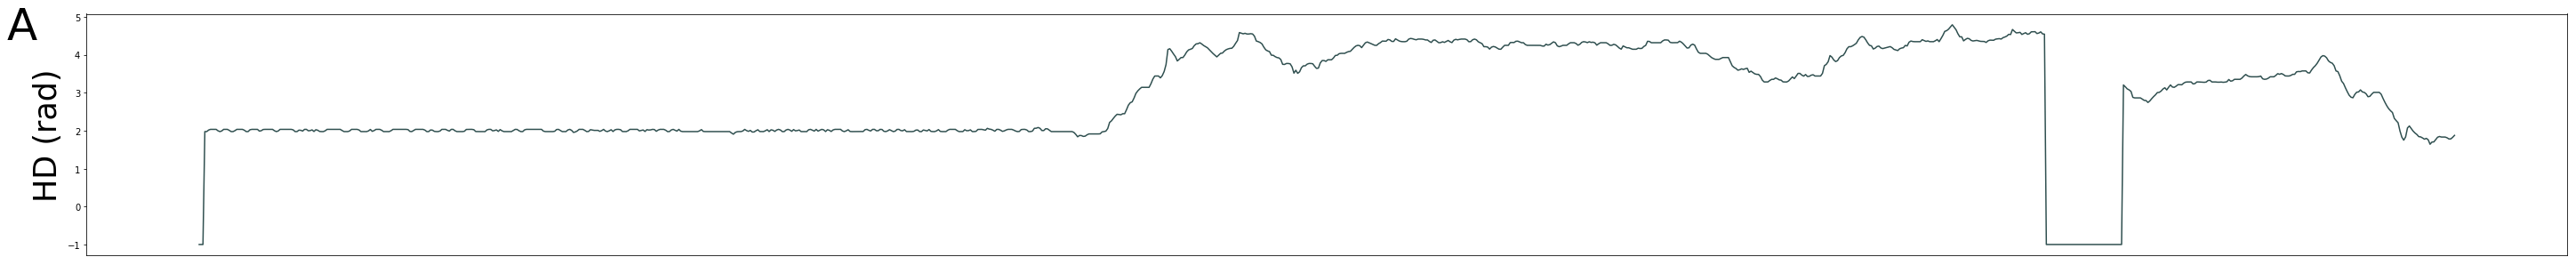

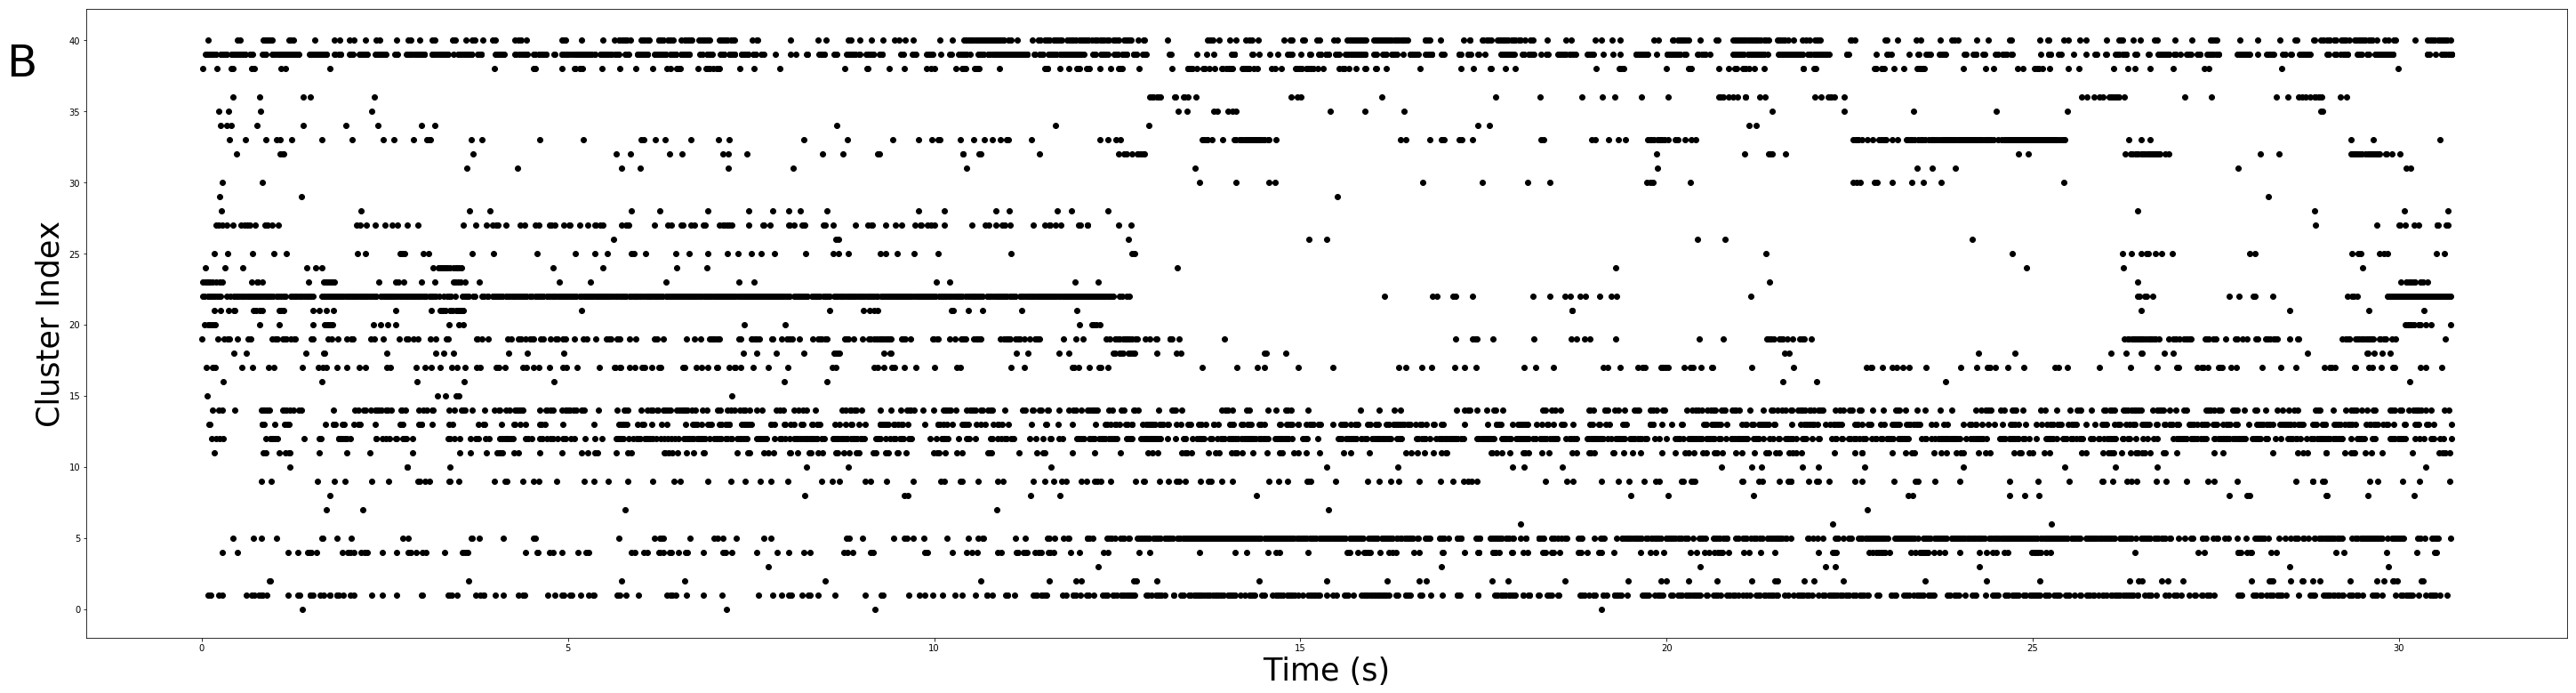

In [6]:
### Visualizing raster plot for spike times ###

#Recall: r_spk_ang = 20000.0 / 39.06

raster_hd_startFrame = 0
raster_hd_endFrame = 1200

## Show the Head direction ##
plt.figure(figsize=(50,5))
plt.plot(hd_subArr[raster_hd_startFrame:raster_hd_endFrame], color='darkslategray')
plt.xticks([])
plt.ylabel('HD (rad)', fontsize=35)
plt.text(0.1, 0.8, "A", fontsize=50, transform=plt.gcf().transFigure)
plt.show()


## Show the raster plot ##
plt.figure(figsize=(50,13))

#Iterate through clusters and visualize
for clusIdx in range(0,len(spkTimes)):
    #Convert to the time ranges in the correct frequency
    raster_spk_startTime = float(raster_hd_startFrame) * r_spk_ang
    raster_spk_endTime = float(raster_hd_endFrame) * r_spk_ang
    
    #Extract the spikes in the timerange
    raster_inRange_binArr = (spkTimes[clusIdx]>=raster_spk_startTime) & (spkTimes[clusIdx]<=raster_spk_endTime)
    raster_spk_arr = np.divide( np.extract(raster_inRange_binArr, spkTimes[clusIdx]) , 20000.0 )
    #Create the array for indeces
    raster_idx_arr = [clusIdx]*len(raster_spk_arr)
    
    plt.scatter(raster_spk_arr, raster_idx_arr, c='black')

    
#Add axis labels and show
plt.xlabel('Time (s)', fontsize=35)
plt.ylabel('Cluster Index', fontsize=35)
plt.text(0.1, 0.8, "B", fontsize=50, transform=plt.gcf().transFigure)
plt.show()


In [7]:
### Extract the nearest head direction for each spiking event ###

spk_HDs = []

#Iterate through each spike cluster to extract the head direction radian at each spike
for spkArr in spkTimes:    
    #Calculate the frame of the HD recording for each spk, rounding to nearest integer
    hd_frames_float = spkArr / r_spk_ang
    hd_frames = np.rint(hd_frames_float).astype(int)
            
    #Take the head direction at each (converted) spike time
    #If the index == N_ang, take the N_ang-1-th index since HD should not change that much (thus mode='clip')
    cur_spkHD = np.take(hd_subArr, hd_frames, mode='clip')
    
    #User indication and Add to the overall array
    print("Raw head direction array length: %d; frame range: %d - %d" % (len(hd_frames),min(hd_frames),max(hd_frames)))
    spk_HDs.append(cur_spkHD)    
    
    

Raw head direction array length: 10089; frame range: 54 - 873911
Raw head direction array length: 381824; frame range: 3 - 873942
Raw head direction array length: 32179; frame range: 36 - 873935
Raw head direction array length: 9271; frame range: 302 - 873645
Raw head direction array length: 150139; frame range: 11 - 873939
Raw head direction array length: 957160; frame range: 17 - 873942
Raw head direction array length: 26716; frame range: 703 - 873913
Raw head direction array length: 11188; frame range: 66 - 873911
Raw head direction array length: 6805; frame range: 68 - 873657
Raw head direction array length: 190107; frame range: 32 - 873942
Raw head direction array length: 69683; frame range: 47 - 873922
Raw head direction array length: 230040; frame range: 7 - 873943
Raw head direction array length: 312274; frame range: 5 - 873944
Raw head direction array length: 342310; frame range: 4 - 873944
Raw head direction array length: 214466; frame range: 6 - 873942
Raw head direction arr

In [8]:
### QC the HD recording and Spike HDs ###

## QC the head direction subarray ##
hd_subArr_QC_bin = (hd_subArr >= 0)
#Extract only the good head directions
QCed_HDs = np.extract(hd_subArr_QC_bin, hd_subArr)


## QC the head direction for each spike events ##

#Arrays to store the spike time and the head direction when it spikes
QCed_spkTimes = []
QCed_spkHDs = []

for clusIdx, raw_spkHDs in enumerate(spk_HDs):
    #Binary array for good spike head directions
    raw_spkHDs_QC_bin = (raw_spkHDs >= 0)
    
    #Extract and append the spike time and head directions
    cur_QCed_spkTime = np.extract(raw_spkHDs_QC_bin,spkTimes[clusIdx])
    QCed_spkTimes.append(cur_QCed_spkTime)
    cur_QCed_spkHD = np.extract(raw_spkHDs_QC_bin,spk_HDs[clusIdx])
    QCed_spkHDs.append(cur_QCed_spkHD)
    
    #User indication
    print("Length of spike time and HD arrays: %d, %d" % (len(cur_QCed_spkTime),len(cur_QCed_spkHD)))


Length of spike time and HD arrays: 9512, 9512
Length of spike time and HD arrays: 334963, 334963
Length of spike time and HD arrays: 28283, 28283
Length of spike time and HD arrays: 8541, 8541
Length of spike time and HD arrays: 137263, 137263
Length of spike time and HD arrays: 863030, 863030
Length of spike time and HD arrays: 25972, 25972
Length of spike time and HD arrays: 10470, 10470
Length of spike time and HD arrays: 6188, 6188
Length of spike time and HD arrays: 173599, 173599
Length of spike time and HD arrays: 63779, 63779
Length of spike time and HD arrays: 207738, 207738
Length of spike time and HD arrays: 281454, 281454
Length of spike time and HD arrays: 304826, 304826
Length of spike time and HD arrays: 194910, 194910
Length of spike time and HD arrays: 11287, 11287
Length of spike time and HD arrays: 9095, 9095
Length of spike time and HD arrays: 65036, 65036
Length of spike time and HD arrays: 130309, 130309
Length of spike time and HD arrays: 113691, 113691
Length o

Cluster 0	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


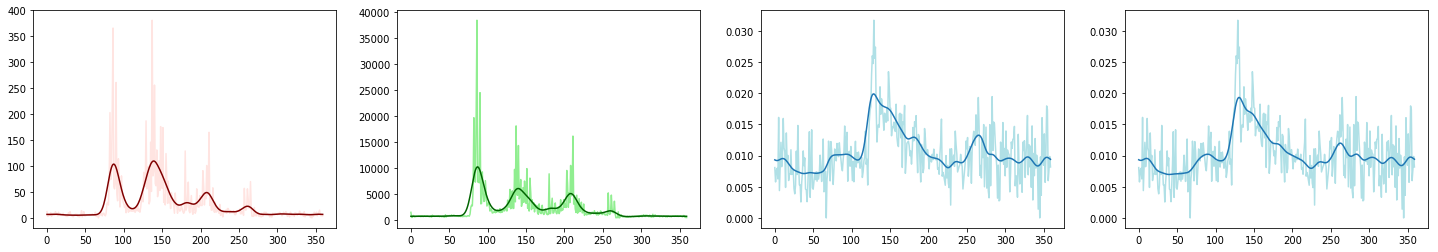

Cluster 1	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


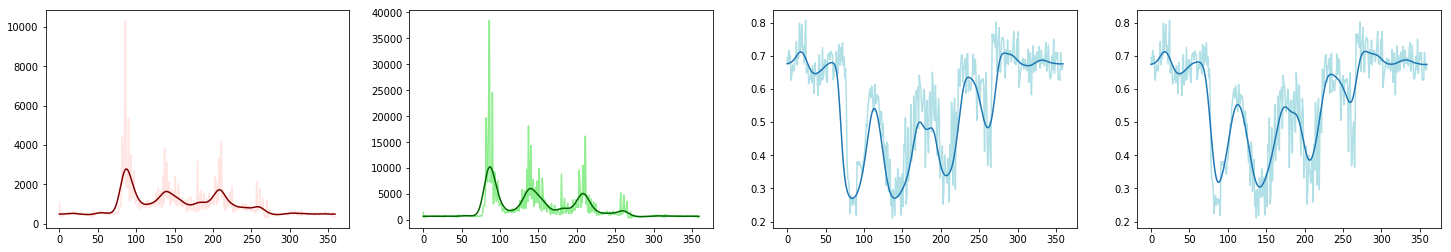

Cluster 2	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


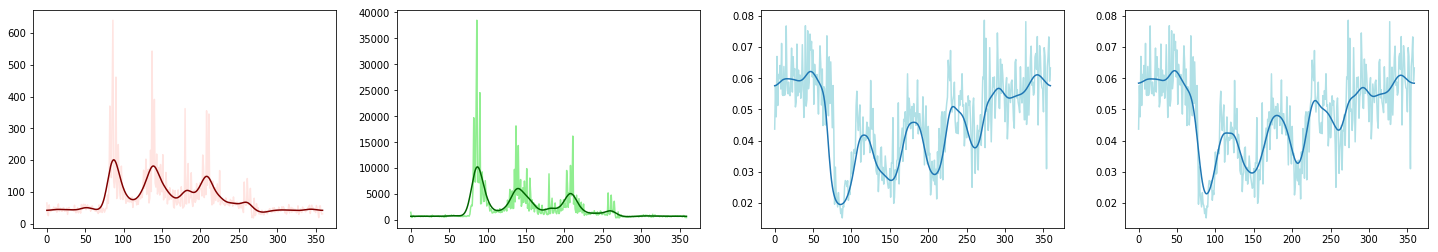

Cluster 3	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


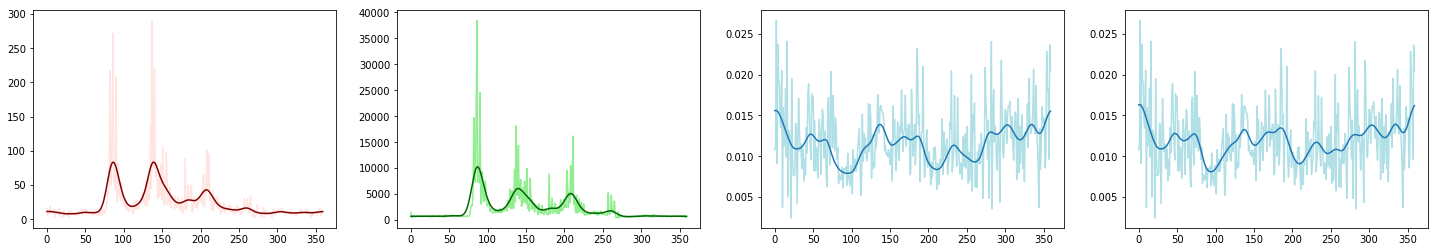

Cluster 4	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


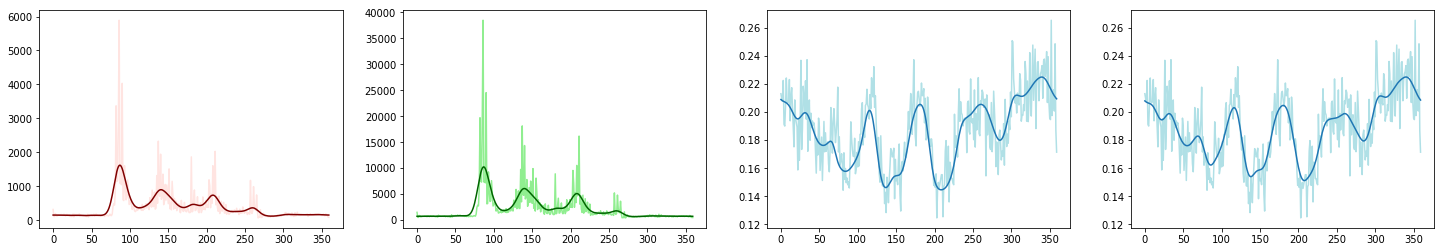

Cluster 5	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


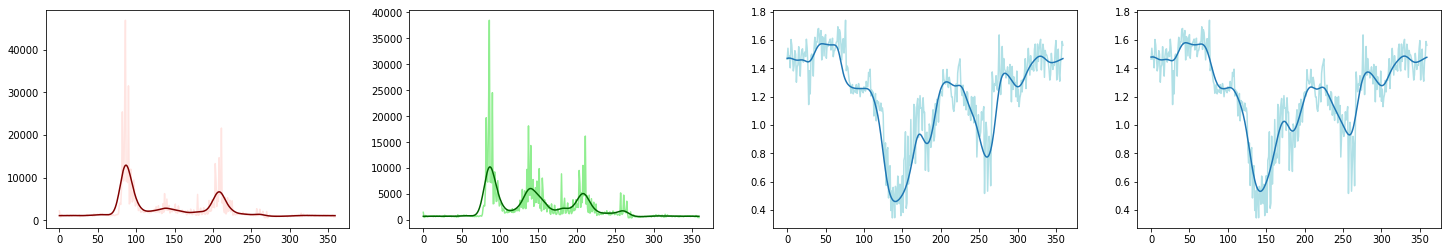

Cluster 6	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


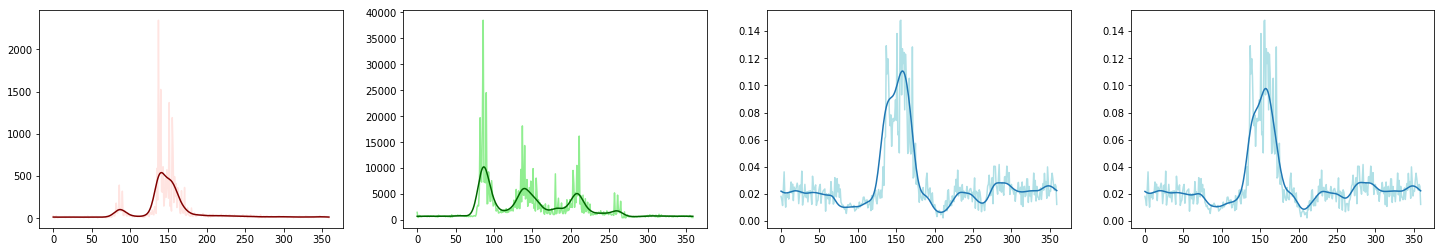

Cluster 7	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


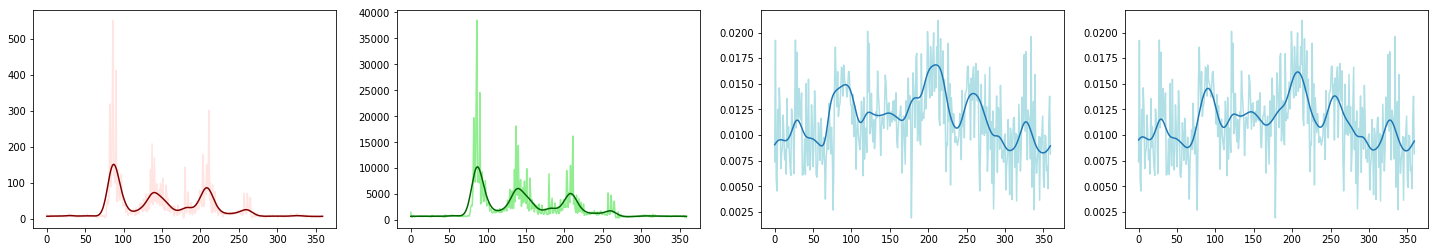

Cluster 8	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


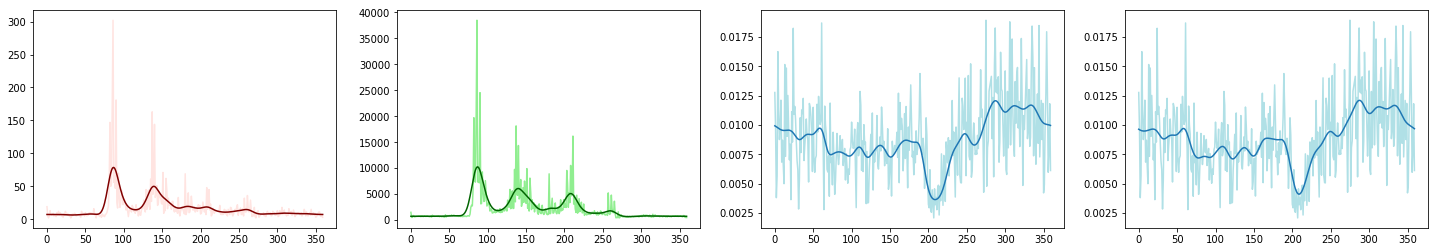

Cluster 9	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


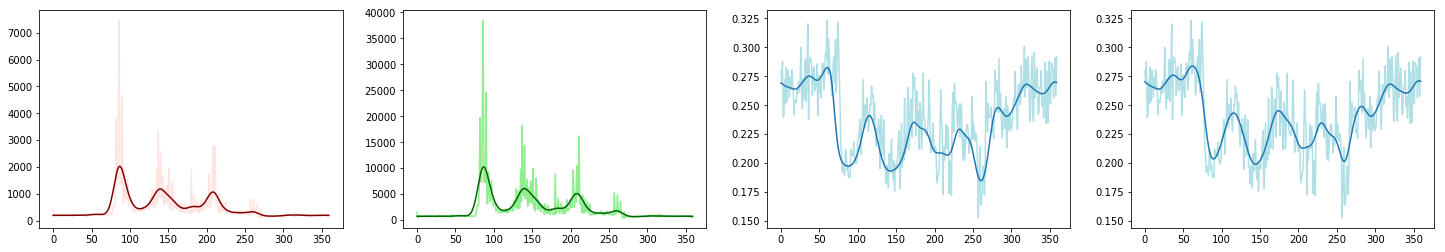

Cluster 10	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


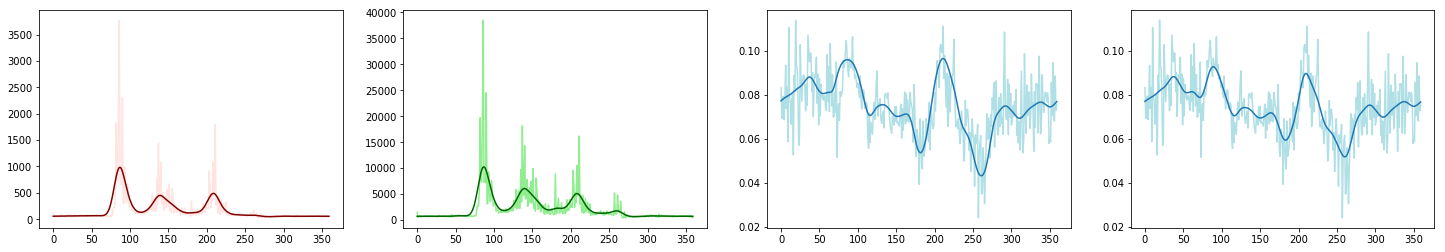

Cluster 11	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


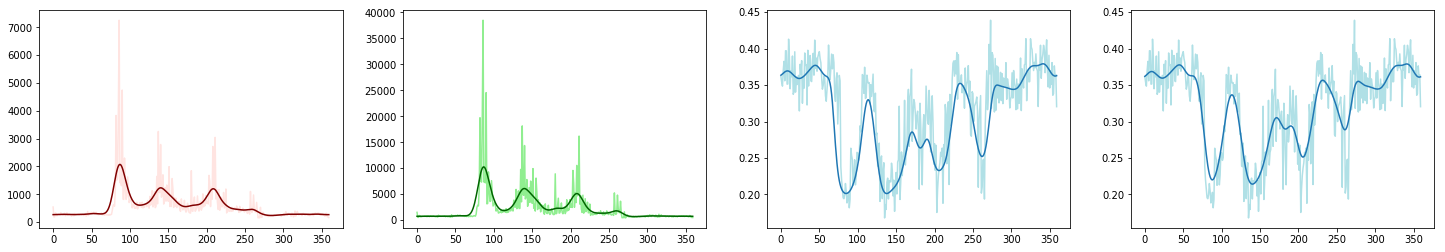

Cluster 12	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


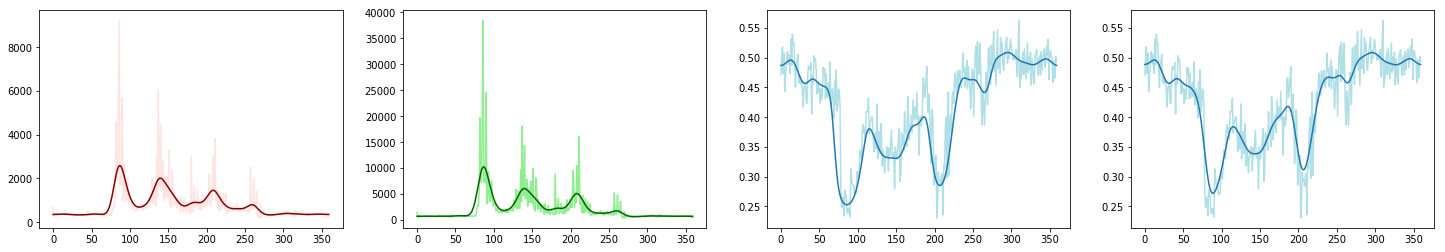

Cluster 13	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


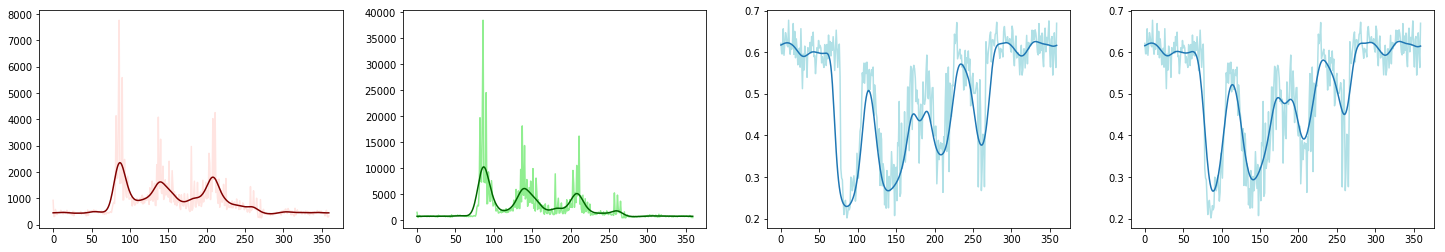

Cluster 14	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


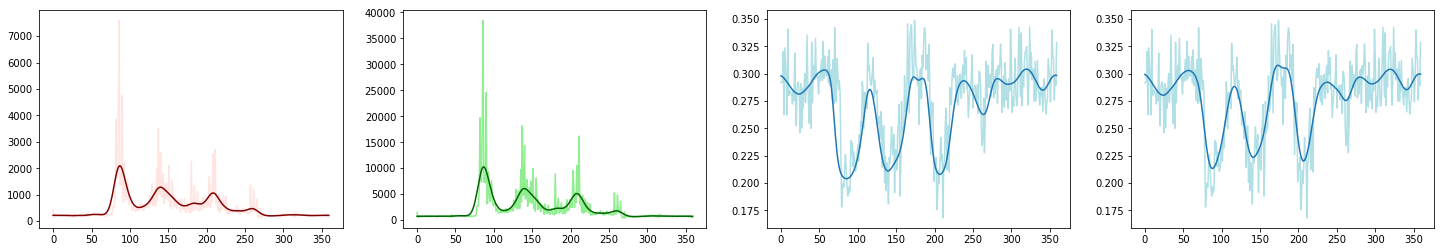

Cluster 15	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


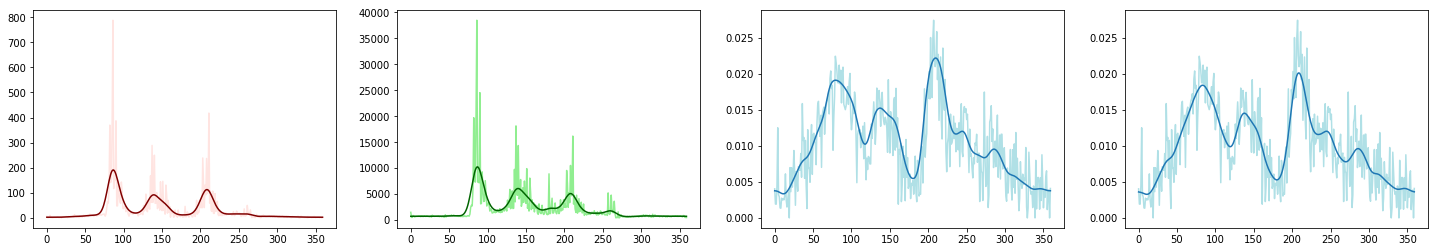

Cluster 16	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


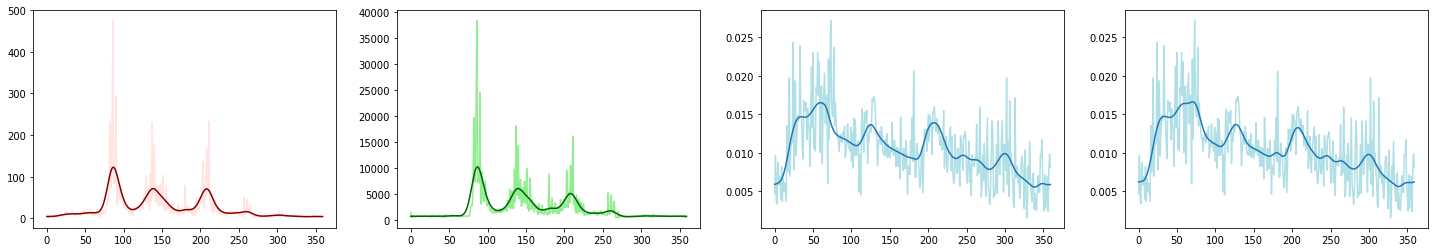

Cluster 17	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


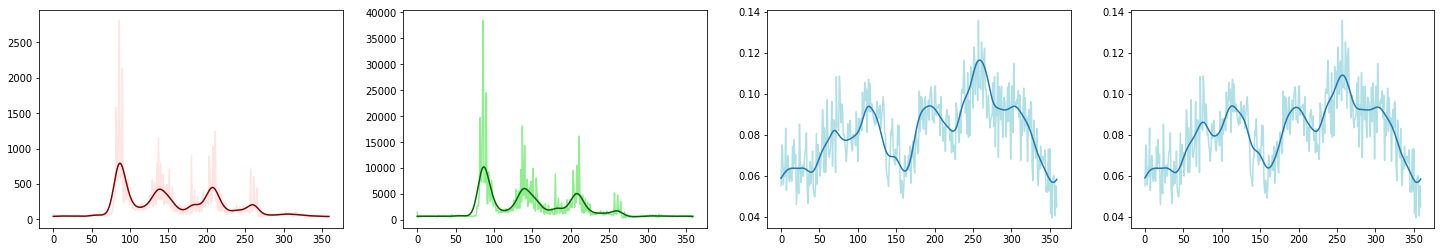

Cluster 18	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


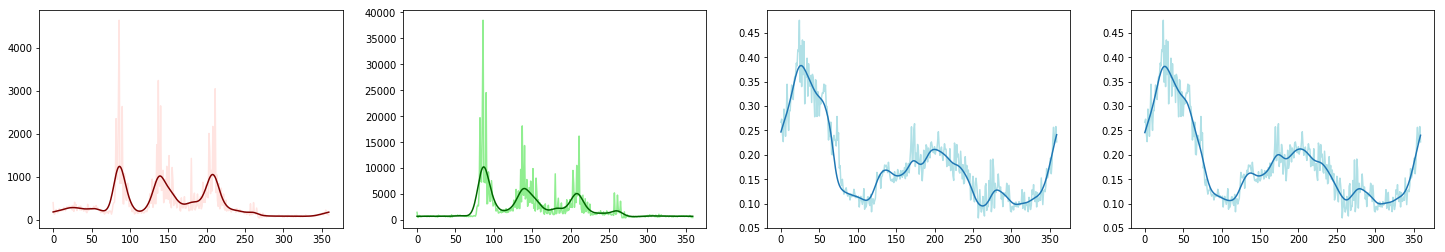

Cluster 19	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


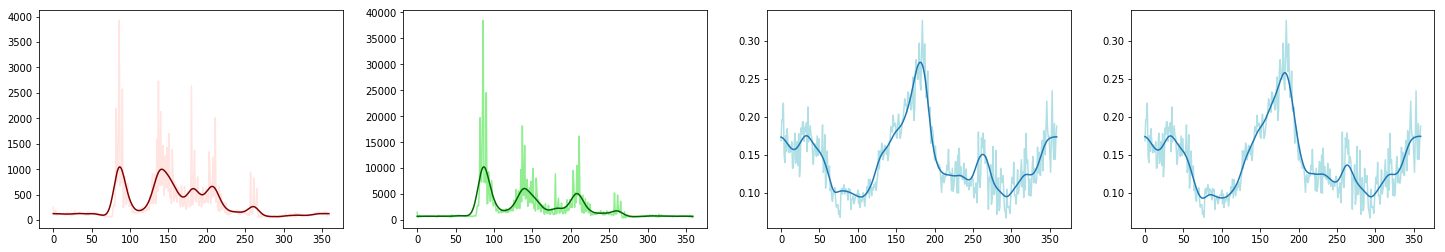

Cluster 20	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


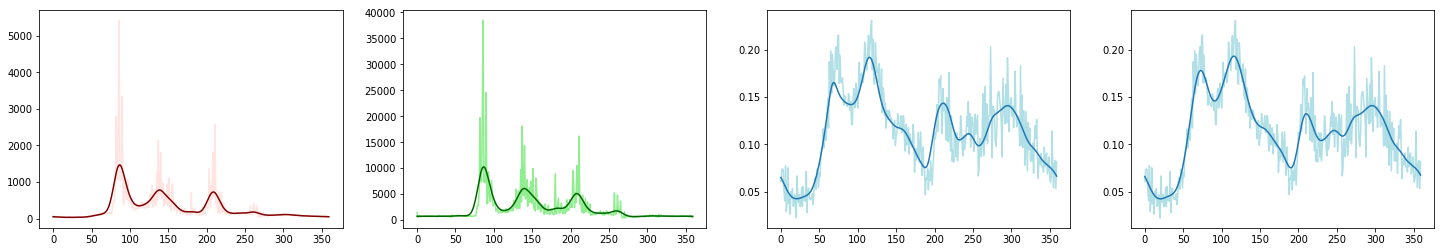

Cluster 21	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


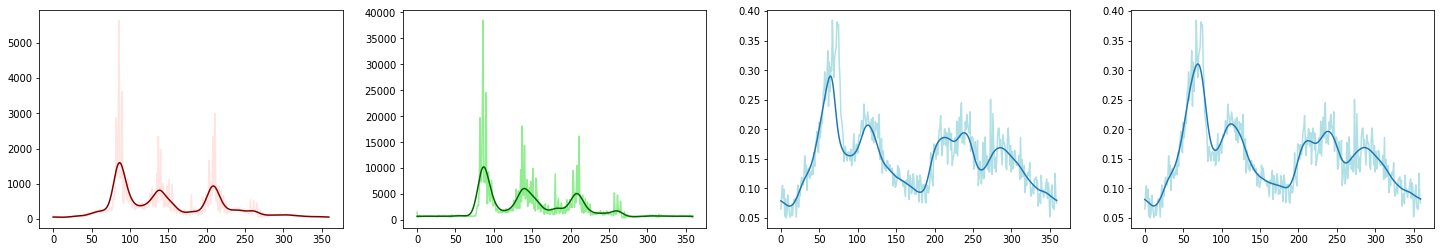

Cluster 22	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


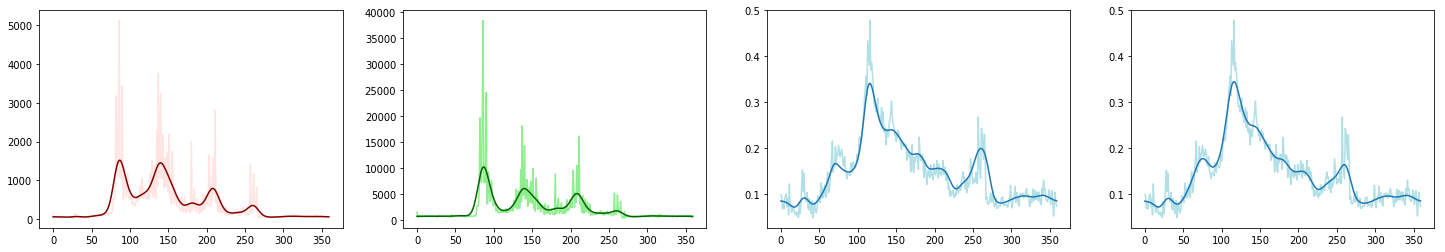

Cluster 23	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


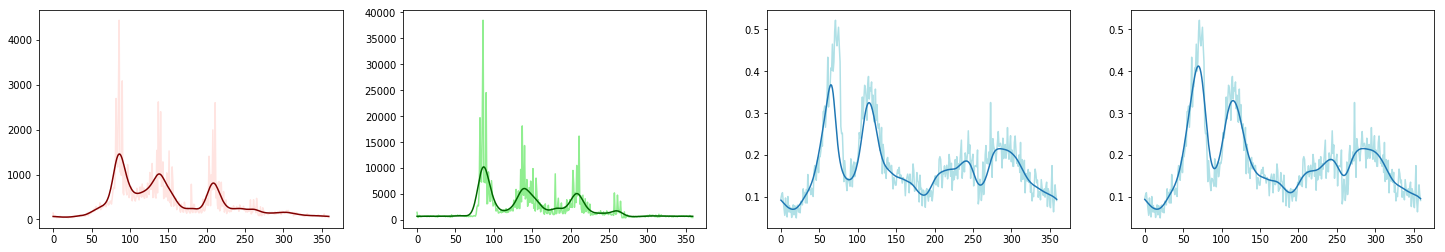

Cluster 24	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


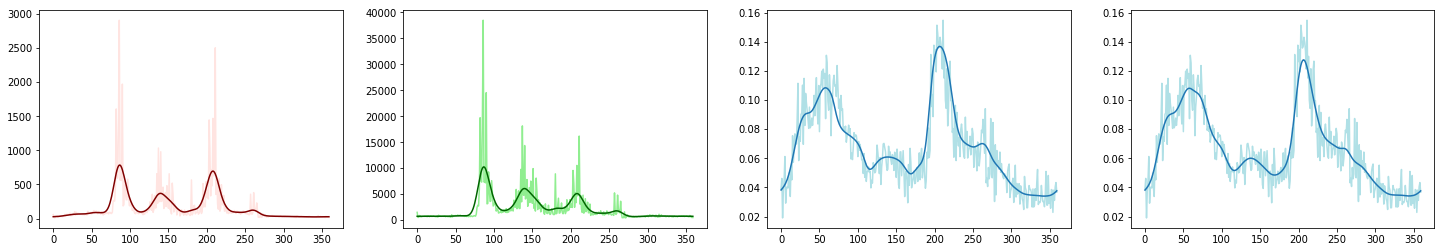

Cluster 25	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


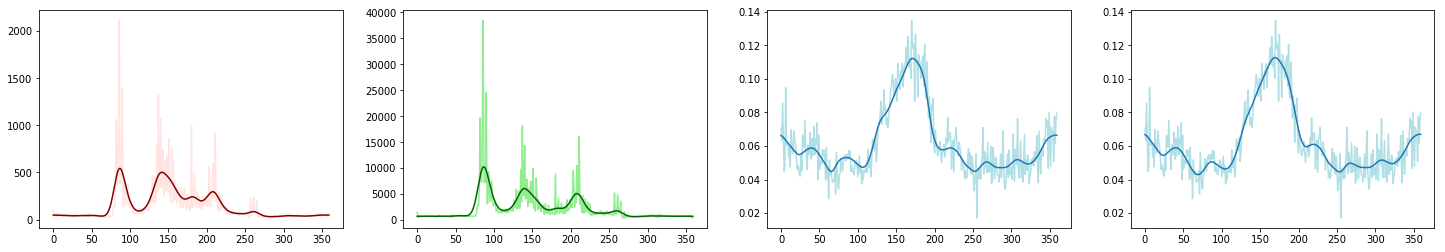

Cluster 26	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


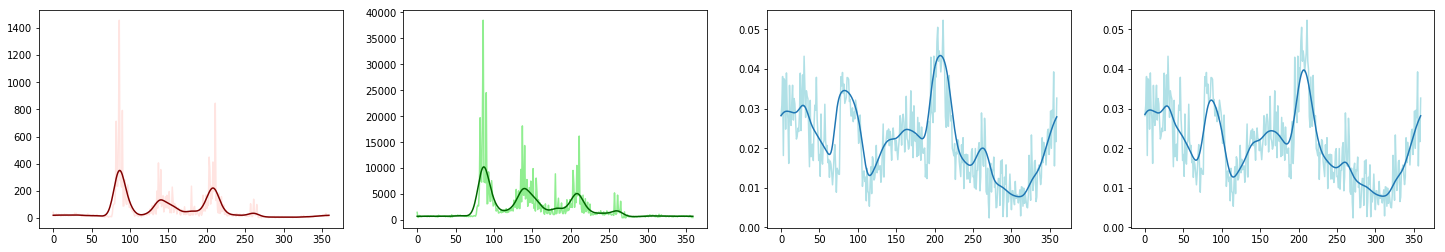

Cluster 27	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


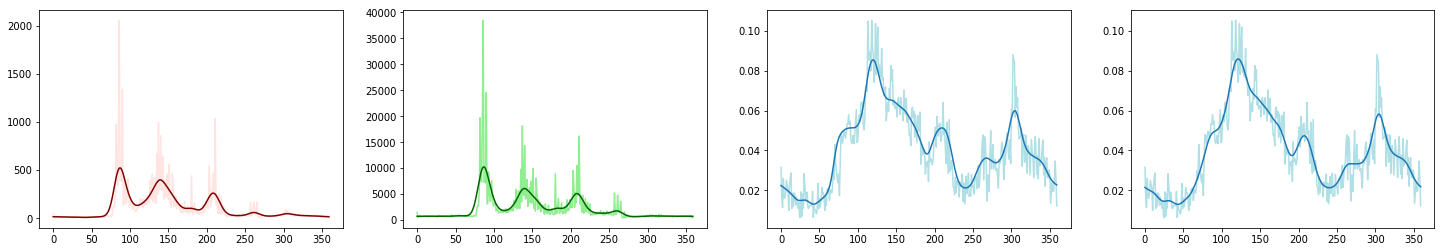

Cluster 28	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


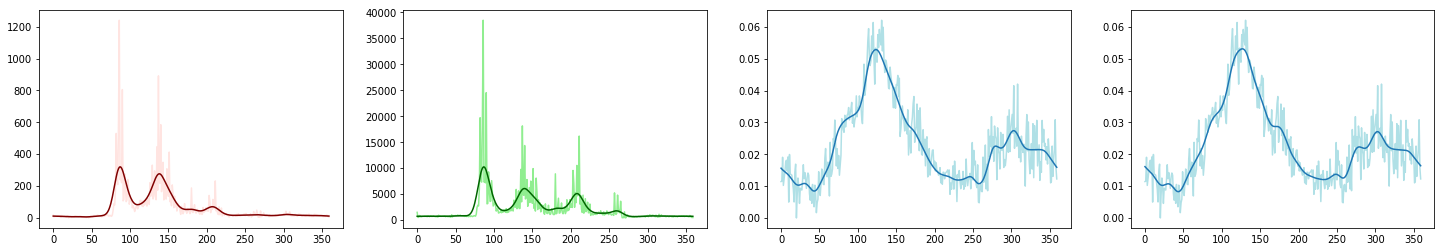

Cluster 29	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


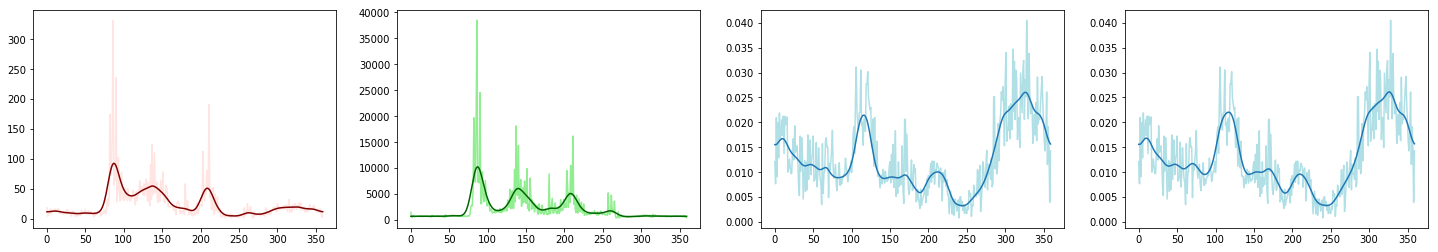

Cluster 30	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


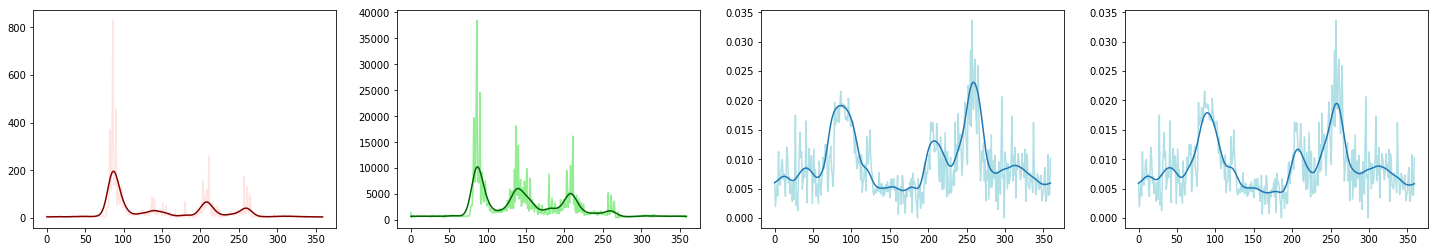

Cluster 31	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


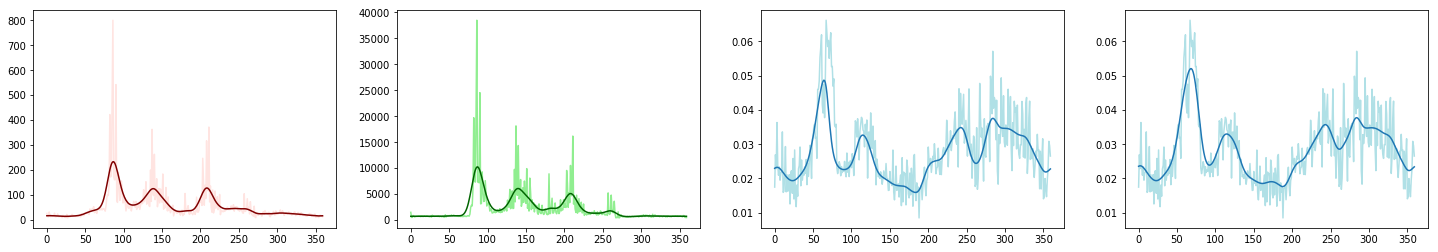

Cluster 32	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


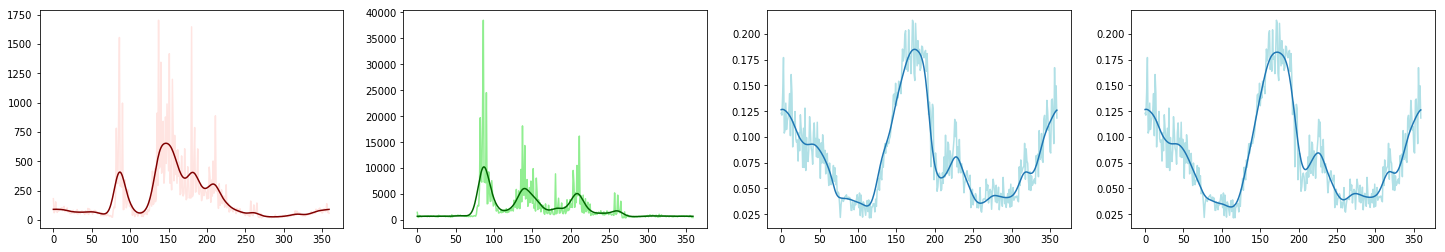

Cluster 33	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


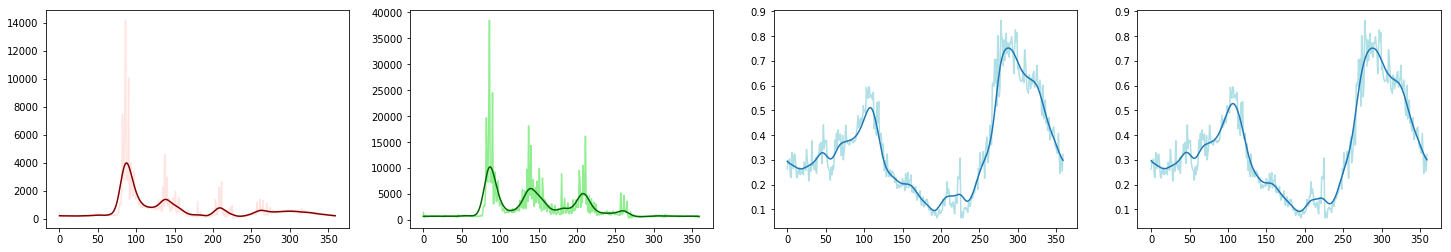

Cluster 34	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


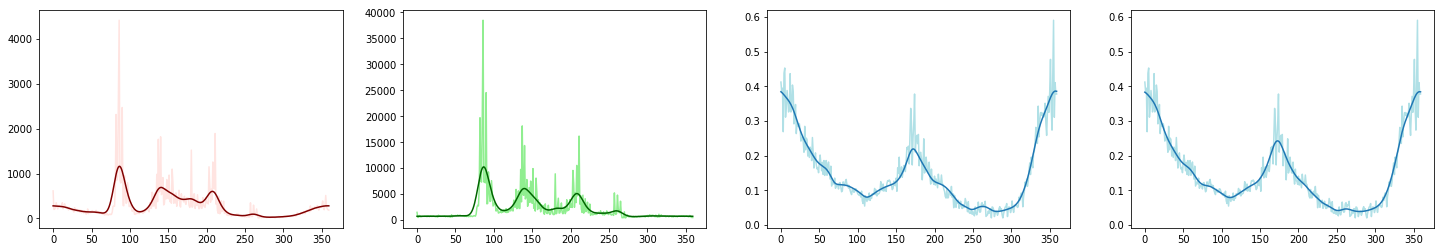

Cluster 35	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


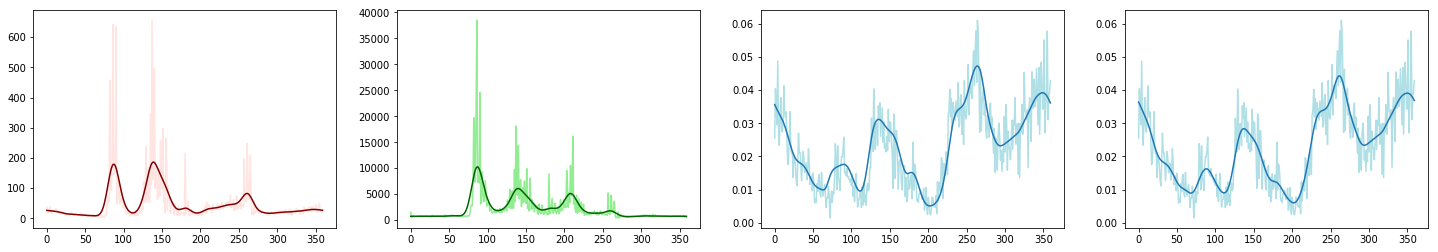

Cluster 36	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


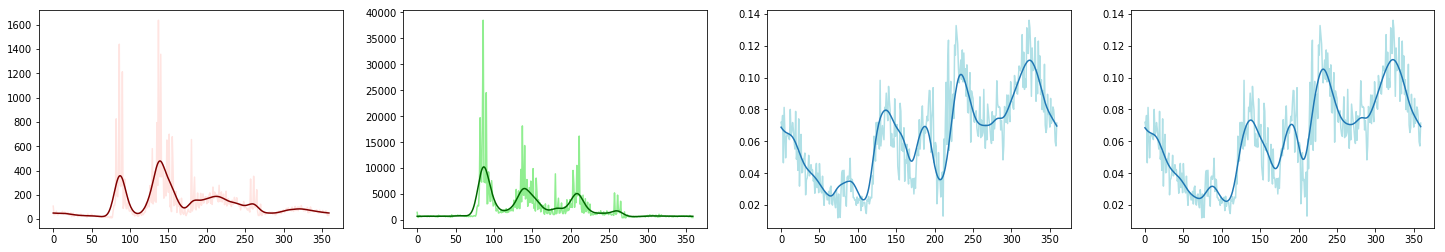

Cluster 37	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


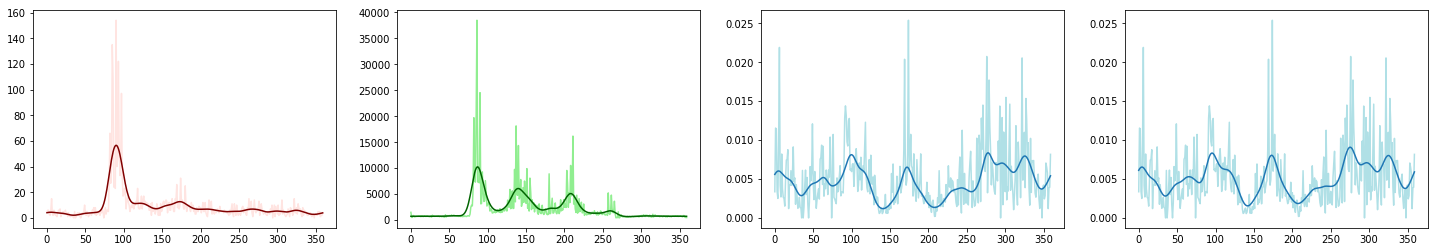

Cluster 38	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


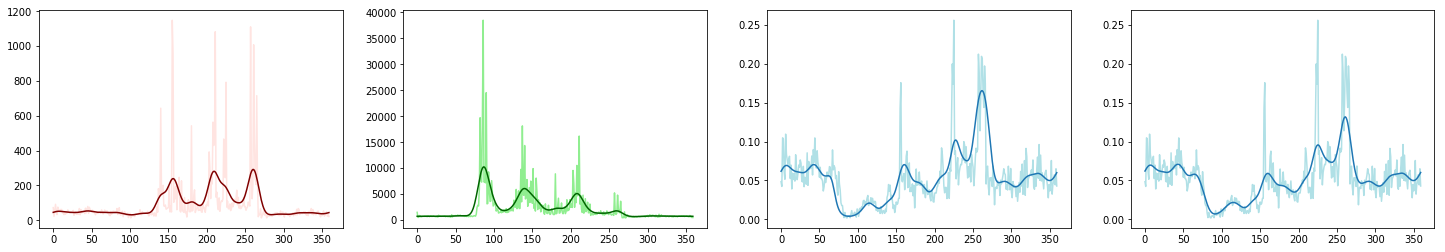

Cluster 39	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


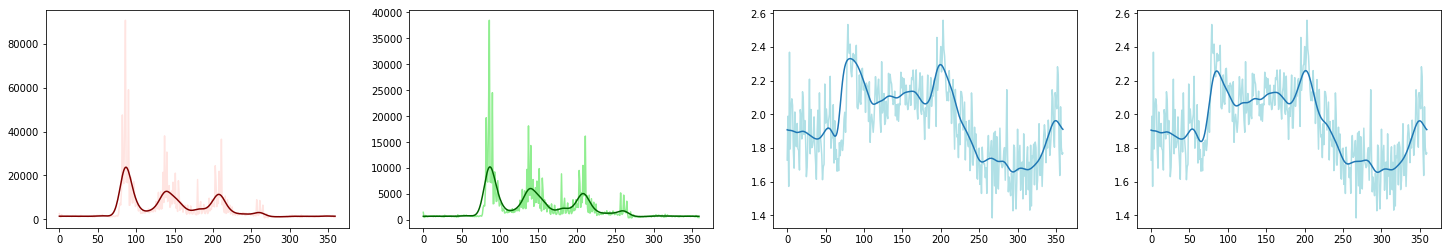

Cluster 40	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


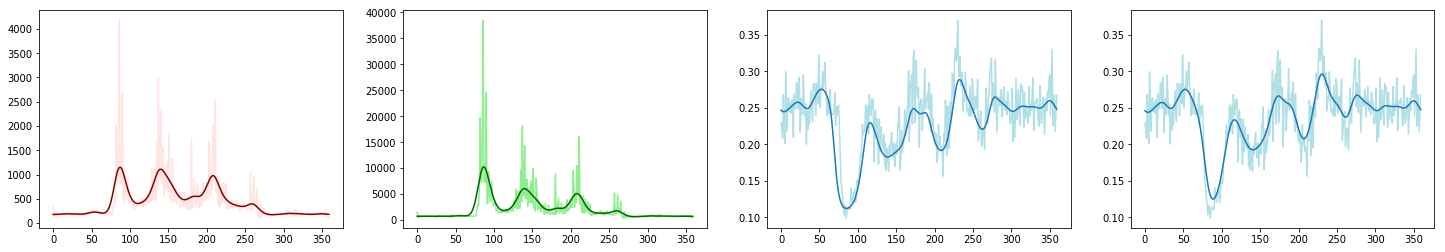

In [9]:
### Compute the HD fields via normalizing for time ###

## NOTE ##
# According to the paper:
# The HD fields were computed as the ratio between histograms of spike count and total time
# spent in each direction in bins of 1 degree and smoothed with a Gaussian kernel of 6° s.d
##########

N_bins = 360 #bins of 1 degree

#Smoothing related imports
from scipy import signal
from scipy import ndimage

#Array for head direction fields
HD_fields_postSmooth = []    #Correctly computed fields, smoothed after dividing for firing rate
HD_fields_preSmoothed = []   #Correctly computed fields, smoothed before dividing for firing rate

#Iterate through each of the spike head direction array
for clusIdx, clus_HDs in enumerate(QCed_spkHDs):
    #Generate the head direction histogram
    clus_HDhist = np.histogram(clus_HDs, bins=N_bins, range=(0.0,2*np.pi))[0].astype(float) 
    clus_HDhist_smoothed = ndimage.filters.gaussian_filter(clus_HDhist,6,mode='wrap')
    #print(clus_HDhist)
    
    #Generate histogram for time spent in each bin
    timeHist = np.histogram(QCed_HDs, bins=N_bins, range=(0.0,2*np.pi))[0].astype(float)
    timeHist_smoothed = ndimage.filters.gaussian_filter(timeHist,6,mode='wrap')
    
    #Compute the head direction field
    HDfield = np.divide(clus_HDhist, timeHist)
    HDfield_smoothed = ndimage.filters.gaussian_filter(HDfield,6,mode='wrap')
    
    #Compute the head direction from pre-smoothe data
    HDfield_preSmoothed = np.divide(clus_HDhist_smoothed, timeHist_smoothed)
    
    #Append and visualize
    HD_fields_postSmooth.append(HDfield_smoothed)
    HD_fields_preSmoothed.append(HDfield_preSmoothed)
    
    
    ## Visualization ##
    print("Cluster %d\tSpike histogram, Time histogram, Pre-smoothing, Post-smoothing"%clusIdx)
    #Set up figure
    fig, ax = plt.subplots(1,4)
    fig.set_figwidth(25)
    #Plot the spiking histogram
    ax[0].plot(clus_HDhist,color='mistyrose')
    ax[0].plot(clus_HDhist_smoothed, color='maroon')
    #Plot the total time spent histogram
    ax[1].plot(timeHist,color='lightgreen')
    ax[1].plot(timeHist_smoothed,color='darkgreen')
    #Plot the pre-smoothed
    ax[2].plot(HDfield,color='powderblue')
    ax[2].plot(HDfield_preSmoothed,color='#1f77b4')
    #Plot the post-smoothed
    ax[3].plot(HDfield,color='powderblue')
    ax[3].plot(HDfield_smoothed,color='#1f77b4')
    plt.show()



Cluster 33	Spike histogram, Time histogram, Pre-smoothing, Post-smoothing


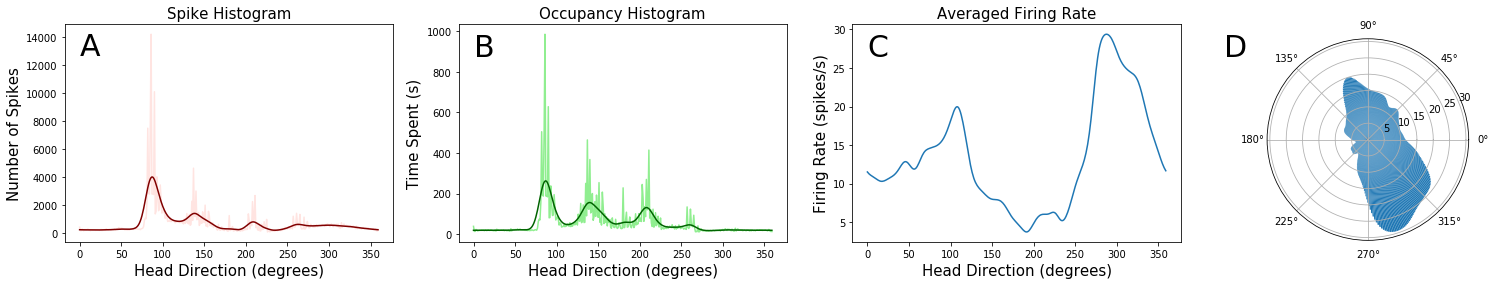

In [10]:
### Compute the HD fields via normalizing for time for a single cluster ###

# THIS IS JUST USED TO MAKE GRAPHS

N_bins = 360 #bins of 1 degree

#Smoothing related imports
from scipy import signal
from scipy import ndimage

clusIdx = 33

#Generate the head direction histogram
clus_HDhist = np.histogram(QCed_spkHDs[clusIdx], bins=N_bins, range=(0.0,2*np.pi))[0].astype(float) 
clus_HDhist_smoothed = ndimage.filters.gaussian_filter(clus_HDhist,6,mode='wrap')
#print(clus_HDhist)

#Generate histogram for time spent in each bin
timeHist = np.histogram(QCed_HDs, bins=N_bins, range=(0.0,2*np.pi))[0].astype(float) / 39.06
timeHist_smoothed = ndimage.filters.gaussian_filter(timeHist,6,mode='wrap')

#Compute the head direction field
HDfield = np.divide(clus_HDhist, timeHist)
HDfield_smoothed = ndimage.filters.gaussian_filter(HDfield,6,mode='wrap')

#Compute the head direction from pre-smoothe data
HDfield_preSmoothed = np.divide(clus_HDhist_smoothed, timeHist_smoothed)



## Visualization ##
print("Cluster %d\tSpike histogram, Time histogram, Pre-smoothing, Post-smoothing"%clusIdx)

#Set up figure
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
#Plot the spiking histogram
ax[0].plot(clus_HDhist,color='mistyrose')
ax[0].plot(clus_HDhist_smoothed, color='maroon')
ax[0].set_title("Spike Histogram", fontsize=15)
ax[0].set_xlabel('Head Direction (degrees)', fontsize=15)
ax[0].set_ylabel('Number of Spikes', fontsize=15)
ax[0].annotate('A', xy=(0, ax[0].get_ylim()[1]*.85), fontsize=30)
#Plot the total time spent histogram
ax[1].plot(timeHist,color='lightgreen')
ax[1].plot(timeHist_smoothed,color='darkgreen')
ax[1].set_title("Occupancy Histogram", fontsize=15)
ax[1].set_xlabel('Head Direction (degrees)', fontsize=15)
ax[1].set_ylabel('Time Spent (s)', fontsize=15)
ax[1].annotate('B', xy=(0, ax[1].get_ylim()[1]*.85), fontsize=30)
#Plot the pre-smoothed
#ax[2].plot(HDfield, color='white')#,color='powderblue')
ax[2].plot(HDfield_preSmoothed,color='#1f77b4')
ax[2].set_title("Averaged Firing Rate", fontsize=15)
ax[2].set_xlabel('Head Direction (degrees)', fontsize=15)
ax[2].set_ylabel('Firing Rate (spikes/s)', fontsize=15)
ax[2].annotate('C', xy=(0, ax[2].get_ylim()[1]*.865), fontsize=30)

#Add a polar plot
polar_ax = fig.add_axes([0.68, 0.13, 0.7, 0.7], polar=True)
polar_ax.bar(np.linspace(0.0,2*np.pi,360,endpoint=False), HDfield_preSmoothed, width=((2.0*np.pi)/360.0))
#polar_ax.annotate('D', xy=(np.radians(115), (polar_ax.get_ylim()[1]*1.01)), fontsize=30)
plt.text(0.93, 0.77, "D", fontsize=30, transform=plt.gcf().transFigure)
plt.show()



Total number of clusters detected: 41

6
7


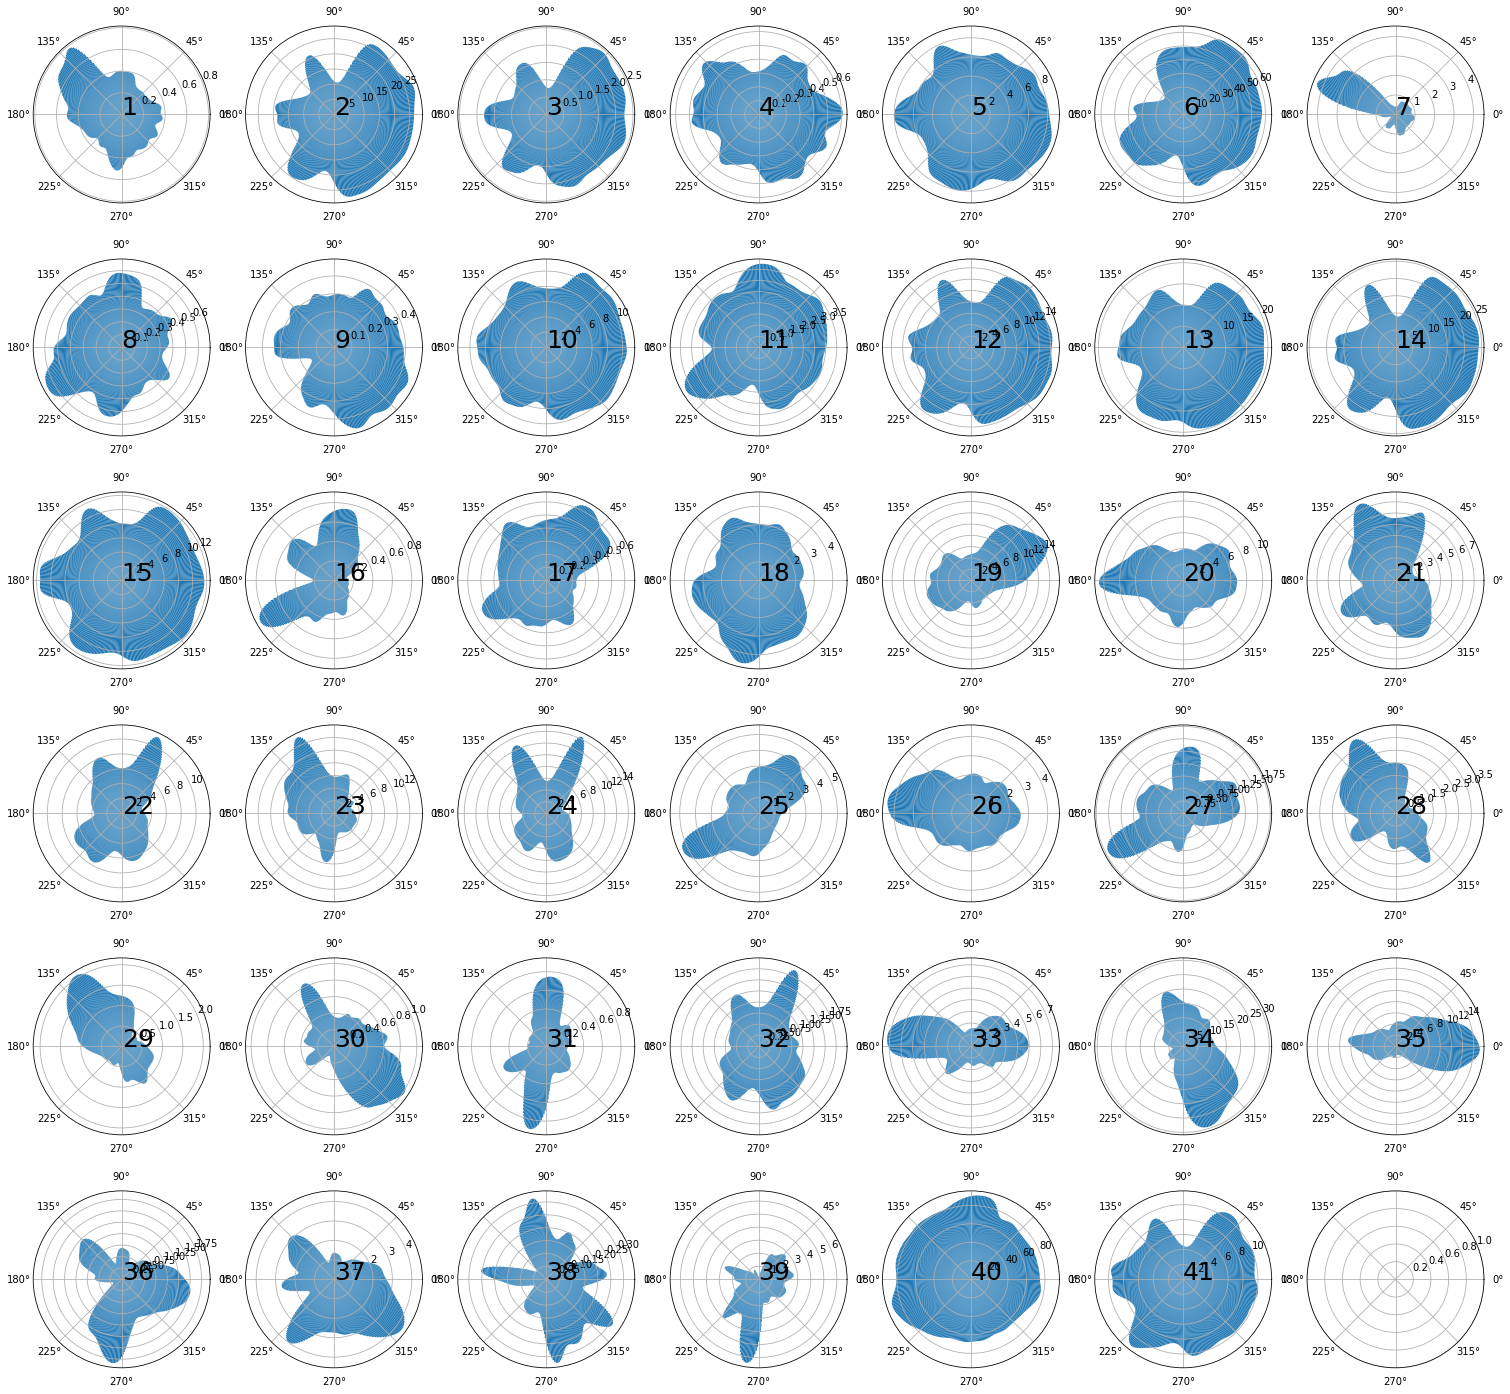

In [106]:
## Visualize all HD fields ##

print("Total number of clusters detected: %d\n" % len(HD_fields_preSmoothed))

#Set up polar subplots
num_rows = 6
num_cols = 7

pFig, pAx = plt.subplots(num_rows,num_cols, figsize=(26,25), subplot_kw=dict(projection='polar'))

#Set-up for individual polar plots
thetas = np.linspace(0.0,2*np.pi,360,endpoint=False)
widths = ((2.0*np.pi)/360.0)

print(len(pAx)) #TODO remove
print(len(pAx[0])) #TODO remove


#Iterate through all pre-smooth HD fields 
for i, current_HD_field in enumerate(HD_fields_preSmoothed):
    #Compute firing rate
    firing_rate = current_HD_field * 39.06
    
    #Compute the row and column indeces to plot this one on
    row_idx = i // num_cols
    col_idx = i % num_cols
        
    #Plot axis and label
    pAx[row_idx,col_idx].bar(thetas, firing_rate, width=widths)
    pAx[row_idx,col_idx].text(np.radians(180), 0, (i+1), fontsize=25)
        
plt.show()

In [ ]:
## Confirmatory stats below  ##

In [11]:
### Construct a numpy matrix of unit-length vectors ###

#Make evenly spaced radians around a circle
rads_linspace = np.linspace(0, 2*np.pi, num=N_bins, endpoint=False)

#Create the x and y components (i.e. i & j)
unit_x_comps = np.reshape( np.cos(rads_linspace) , (N_bins,1) )
unit_y_comps = np.reshape( np.sin(rads_linspace) , (N_bins,1) )

#Reshape the matrix to get the unit vector
unit_vecs = np.concatenate((unit_x_comps, unit_y_comps), axis=1)

print(np.shape(unit_vecs))

(360, 2)


Cell cluster: 0
Percentage with higher magnitude than original: 0.000000


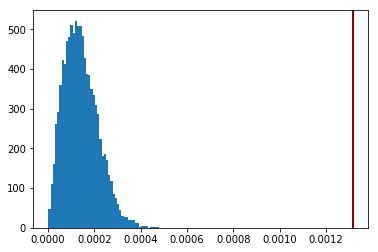

Cell cluster: 1
Percentage with higher magnitude than original: 0.000000


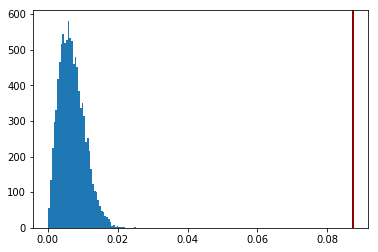

Cell cluster: 2
Percentage with higher magnitude than original: 0.000000


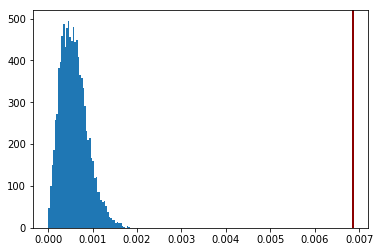

Cell cluster: 3
Percentage with higher magnitude than original: 0.000000


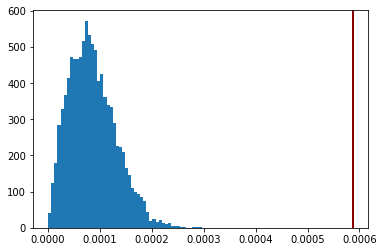

Cell cluster: 4
Percentage with higher magnitude than original: 0.000000


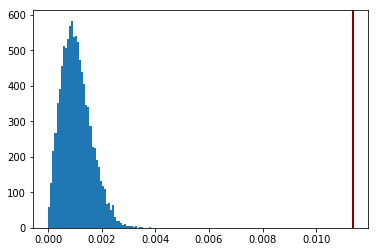

Cell cluster: 5
Percentage with higher magnitude than original: 0.000000


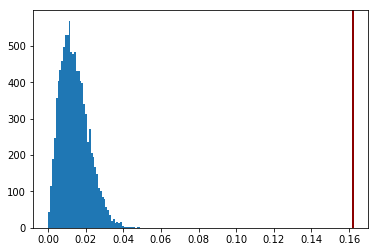

Cell cluster: 6
Percentage with higher magnitude than original: 0.000000


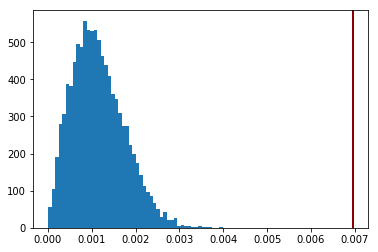

Cell cluster: 7
Percentage with higher magnitude than original: 0.000000


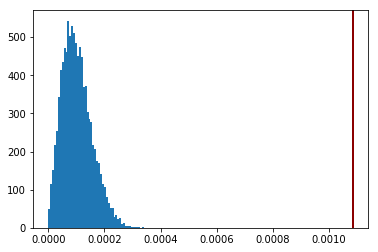

Cell cluster: 8
Percentage with higher magnitude than original: 0.000000


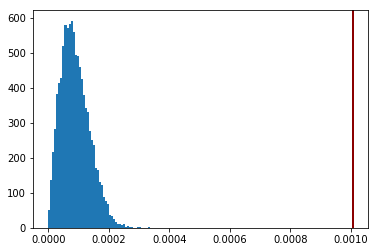

Cell cluster: 9
Percentage with higher magnitude than original: 0.000000


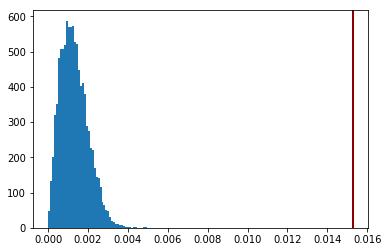

Cell cluster: 10
Percentage with higher magnitude than original: 0.000000


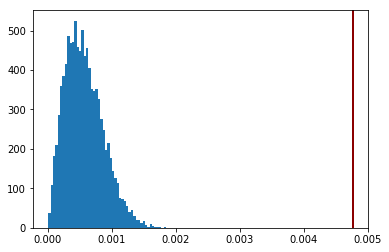

Cell cluster: 11
Percentage with higher magnitude than original: 0.000000


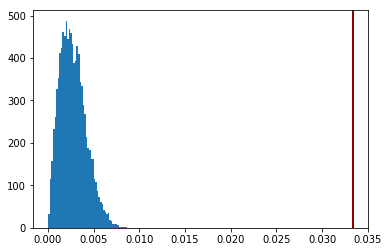

Cell cluster: 12
Percentage with higher magnitude than original: 0.000000


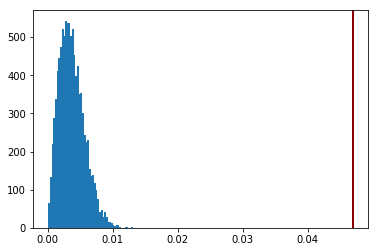

Cell cluster: 13
Percentage with higher magnitude than original: 0.000000


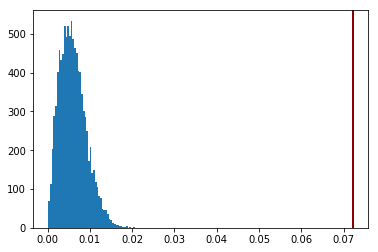

Cell cluster: 14
Percentage with higher magnitude than original: 0.000000


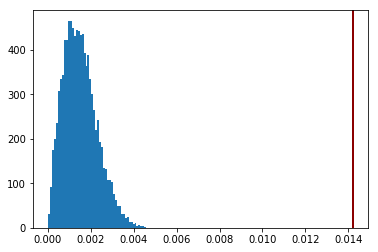

Cell cluster: 15
Percentage with higher magnitude than original: 0.000000


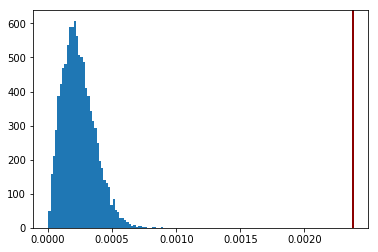

Cell cluster: 16
Percentage with higher magnitude than original: 0.000000


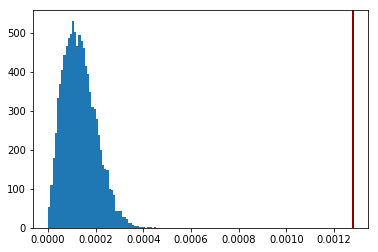

Cell cluster: 17
Percentage with higher magnitude than original: 0.000000


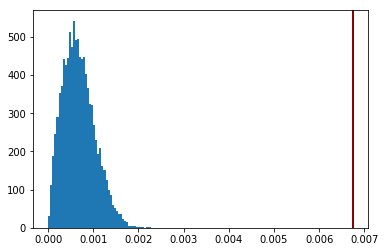

Cell cluster: 18
Percentage with higher magnitude than original: 0.000000


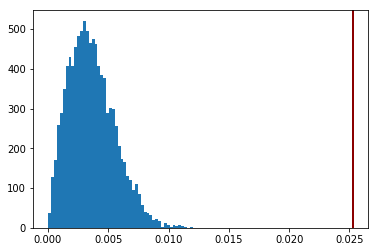

Cell cluster: 19
Percentage with higher magnitude than original: 0.000000


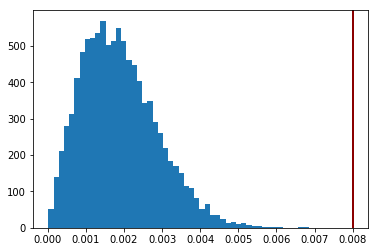

Cell cluster: 20
Percentage with higher magnitude than original: 0.000000


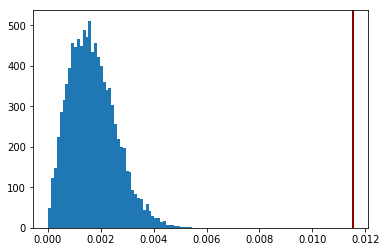

Cell cluster: 21
Percentage with higher magnitude than original: 0.000000


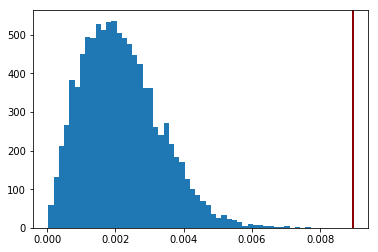

Cell cluster: 22
Percentage with higher magnitude than original: 0.000000


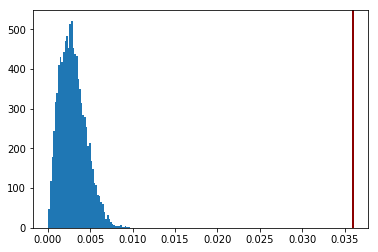

Cell cluster: 23
Percentage with higher magnitude than original: 0.000000


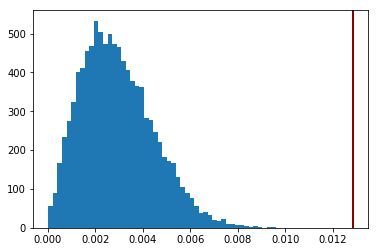

Cell cluster: 24
Percentage with higher magnitude than original: 0.000000


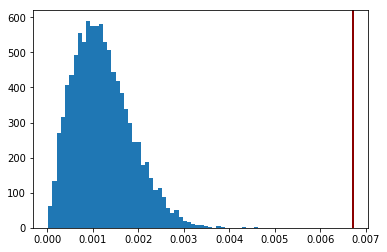

Cell cluster: 25
Percentage with higher magnitude than original: 0.000000


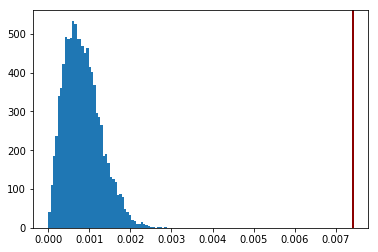

Cell cluster: 26
Percentage with higher magnitude than original: 0.000000


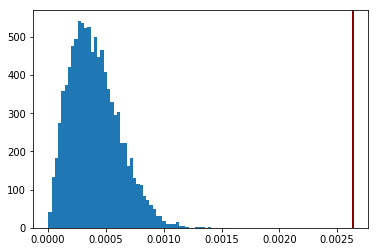

Cell cluster: 27
Percentage with higher magnitude than original: 0.000000


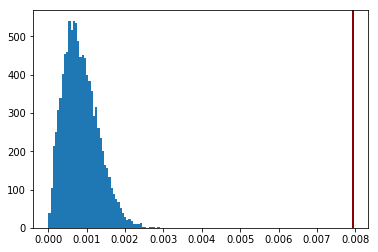

Cell cluster: 28
Percentage with higher magnitude than original: 0.000000


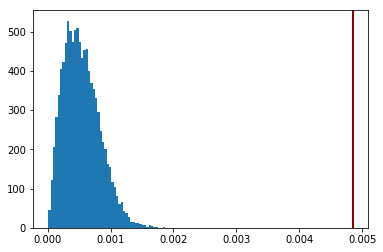

Cell cluster: 29
Percentage with higher magnitude than original: 0.000000


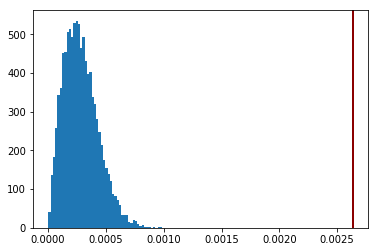

Cell cluster: 30
Percentage with higher magnitude than original: 0.040500


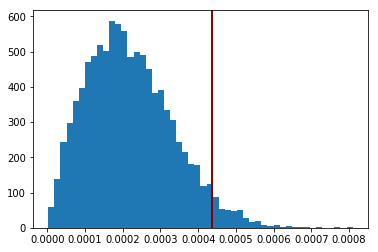

Cell cluster: 31
Percentage with higher magnitude than original: 0.000000


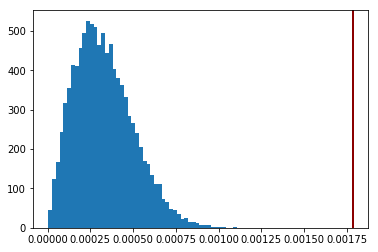

Cell cluster: 32
Percentage with higher magnitude than original: 0.000000


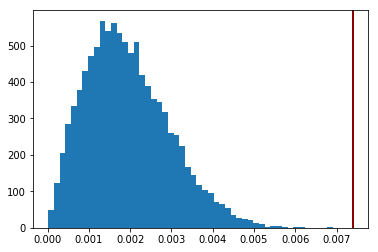

Cell cluster: 33
Percentage with higher magnitude than original: 0.000000


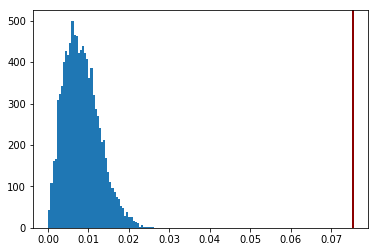

Cell cluster: 34
Percentage with higher magnitude than original: 0.000000


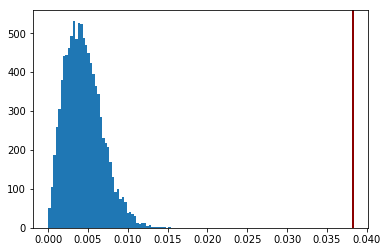

Cell cluster: 35
Percentage with higher magnitude than original: 0.000000


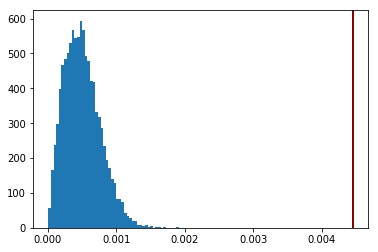

Cell cluster: 36
Percentage with higher magnitude than original: 0.000000


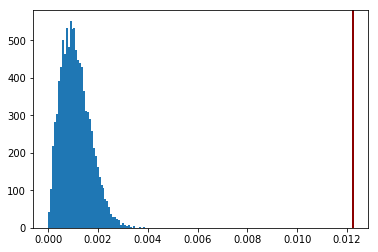

Cell cluster: 37
Percentage with higher magnitude than original: 0.000000


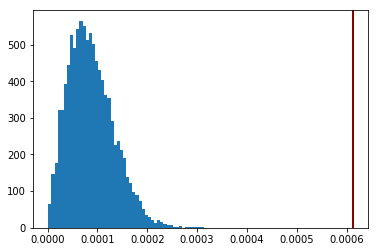

Cell cluster: 38
Percentage with higher magnitude than original: 0.000000


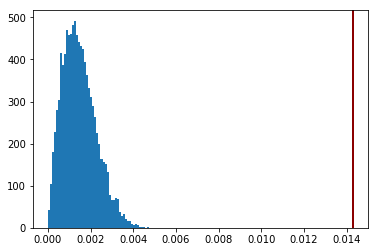

Cell cluster: 39
Percentage with higher magnitude than original: 0.000000


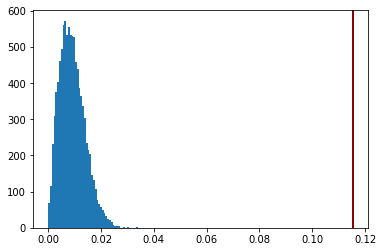

Cell cluster: 40
Percentage with higher magnitude than original: 0.000000


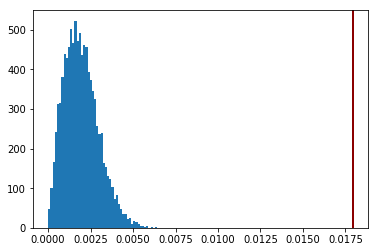

In [12]:
### Permutation Testing ###

##
# Null hypothesis: the firing rate is not dependent on the head direction angle
##


#Number of times to permute for
N_permutation = 10000


p_val_arr = []
ori_norm_arr = []
null_distri_arr = []


#Iterate through each cluster
for clusIdx in range(0,len(HD_fields_preSmoothed)):
    #Compute the magnitude of the original mean vector
    ori_meanVec = np.divide( np.dot( HD_fields_preSmoothed[clusIdx] , unit_vecs ) , N_bins ) #Mean vector component
    ori_norm = np.linalg.norm(ori_meanVec) #Norm of mean vector components
    print("Cell cluster: %d" % clusIdx)

    #Permute for N_Permutation times to generate distribution
    null_distribution = [0.0] * N_permutation
    for nth_permute in range(0,N_permutation):    
        #Permute the HD field preferred firing rate
        permuted_HDfield = np.random.permutation(HD_fields_preSmoothed[clusIdx])

        #Re-compute the vector mean
        permuted_meanVec = np.divide( np.dot( permuted_HDfield , unit_vecs ) , N_bins )
        permuted_norm = np.linalg.norm(permuted_meanVec)

        #Add to null distribution
        null_distribution[nth_permute] = permuted_norm
    
    #Append null distribution
    ori_norm_arr.append(ori_norm)
    null_distri_arr.append(null_distribution)

    #Calculate % of permuted means that has a larger vector magnitude than original
    num_moreSurprising = sum(null_distribution > ori_norm)
    clus_p_val = num_moreSurprising/N_permutation
    p_val_arr.append(clus_p_val)
    print("Percentage with higher magnitude than original: %f" % (clus_p_val))

    #Visualize
    plt.hist(null_distribution, bins=50)
    plt.axvline(x=ori_norm, color='darkred', linestyle='-',linewidth=2)
    plt.show()

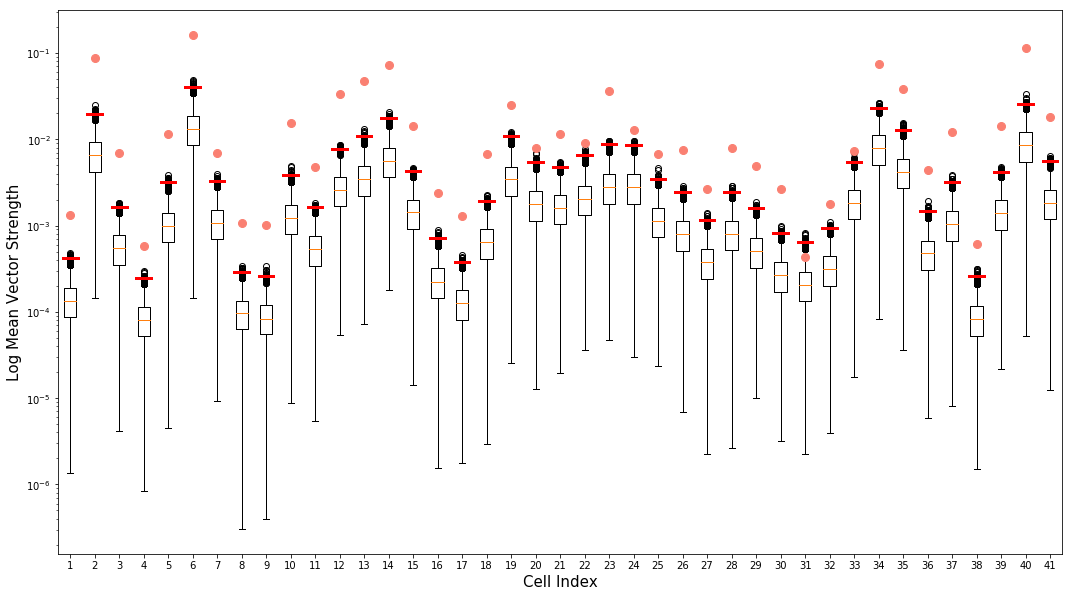

In [13]:
## Visualize the significance ##

# Significance testing, alpha level #
group_alpha = 0.05
indv_alpha = group_alpha / len(ori_norm_arr)


#Figure size and plot boxplot
plt.figure(figsize=(18,10))
plt.boxplot(null_distri_arr)


#Iterate through the null distributions to compute significance levels
for clusIdx in range(0,len(ori_norm_arr)):
    
    #The cut-off for significance
    sig_percentile = (1.0 - indv_alpha) * 100
    y_cutOff = np.percentile(null_distri_arr[clusIdx], sig_percentile)
    
    #Generate the cut-off line
    sigLine_X = [clusIdx+1.0-0.3, clusIdx+1.0+0.3]
    sigLine_Y = [y_cutOff,y_cutOff]
    #Plot the signifiance cut-off line
    plt.plot(sigLine_X, sigLine_Y, linewidth=3, color='red')
    
    #Plot the actual value of the vector strength
    plt.plot(clusIdx+1.0, ori_norm_arr[clusIdx], 'o', color='salmon', markersize=8)


#Labels & show
plt.xlabel("Cell Index", fontsize=15)
plt.ylabel("Log Mean Vector Strength", fontsize=15)
plt.yscale('log')

plt.show()

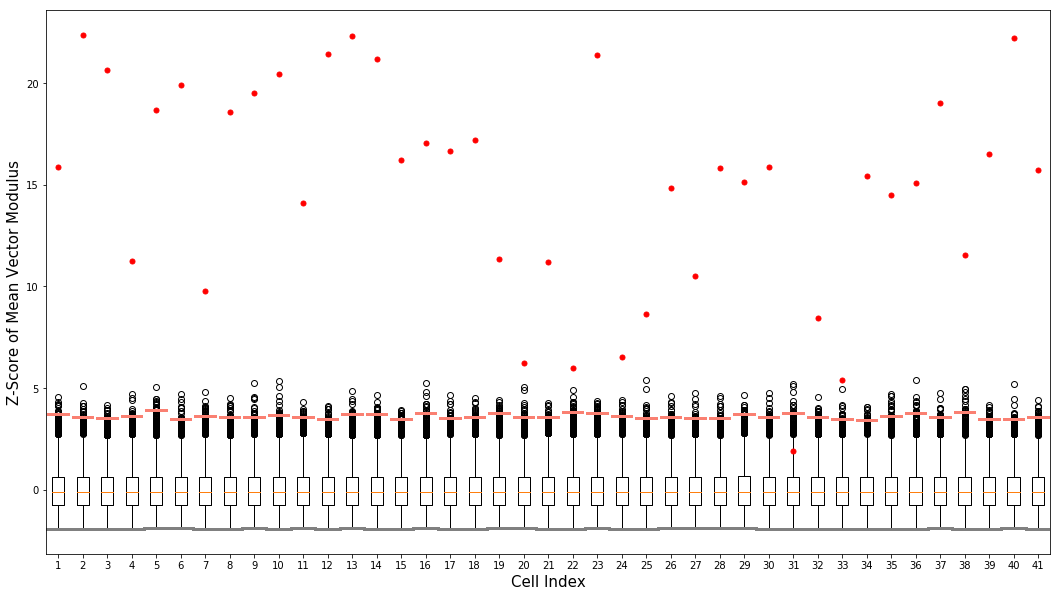

In [29]:
## Visualize the significance via the Z scores##
from scipy.stats import zscore

z_scores = [zscore(arr) for arr in null_distri_arr]

#Figure size and plot boxplot
plt.figure(figsize=(18,10))
plt.boxplot(z_scores)


for clusIdx in range(0,len(null_distri_arr)):
    #Get the standard deviaion and mean of each null distributions
    null_std = np.std(null_distri_arr[clusIdx])
    null_avg = np.mean(null_distri_arr[clusIdx])
    
    newZ = (ori_norm_arr[clusIdx] - null_avg) / null_std
    plt.plot(clusIdx+1.0, newZ, 'o', color='red', markersize=5)
    
    #Compute the significance cut-off of each distribution (non-parametrically)
    sig_percentile = (1.0 - indv_alpha) * 100
    y_cutOff = np.percentile(null_distri_arr[clusIdx], sig_percentile)
    #Compute this z score and plot
    z_cutOff = (y_cutOff - null_avg) / null_std
    x_range = [clusIdx+1.0-0.4, clusIdx+1.0+0.4]
    plt.plot(x_range, [z_cutOff,z_cutOff], linewidth=3, color='salmon')
    
    #Plot 0
    zero_z = (0.0 - null_avg) / null_std
    zero_xRange = [clusIdx+1.0-0.5, clusIdx+1.0+0.5]
    plt.plot(zero_xRange, [zero_z,zero_z], linewidth=3, color='grey')
    
#Label and plot
plt.xlabel("Cell Index", fontsize=15)
plt.ylabel("Z-Score of Mean Vector Modulus", fontsize=15)
plt.show()
